In [15]:
import numpy as np
import xarray as xr
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

### Load Ensemble

In [16]:
# load parameter settings key
key = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/ctsm6_oaat_key.csv'
df_key = pd.read_csv(key)

In [3]:
# load postprocessed dataset 
in_file = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_1985-2023.nc'
ds = xr.open_dataset(in_file) # temporally averaged over 1985-2023

In [4]:
# append key to ds
ds = ds.assign_coords(
    key=('ens', df_key['key'].values),
    param=('ens', df_key['param'].values),
    minmax=('ens', df_key['minmax'].values)
)

ds = ds.set_index(ens=["param", "minmax", "key"], append=True)

In [5]:
# default CLM parameter set
default = ds.isel(ens=0)

### Plot parameter ranking

In [10]:
var = 'EFLX_LH_TOT_global_mean'

cf = 1
#cf = 60*60*24*365

param_list = list(df_key['param'].values)
df_sens = pd.DataFrame(index=param_list)
df_sens[var] = np.nan

# Some parameters min/max value is equivalent to the default setting:
defaults = ['xdrdt','interception_fraction','accum_factor','snw_rds_refrz','decomp_depth_efolding','tpu25ratio','default']

# calculate sensitivity
for p,param in enumerate(param_list):
    if param in defaults:
        df_sens.at[param,var] = cf*np.abs(ds[var].sel(param=param).values - default[var].values)[0]
    else:
        df_sens.at[param,var] = cf*np.abs(ds[var].sel(param=param,minmax='max').values - ds[var].sel(param=param,minmax='min').values)[0]

In [12]:
df_sens = df_sens.sort_values(by=[var],ascending=False)

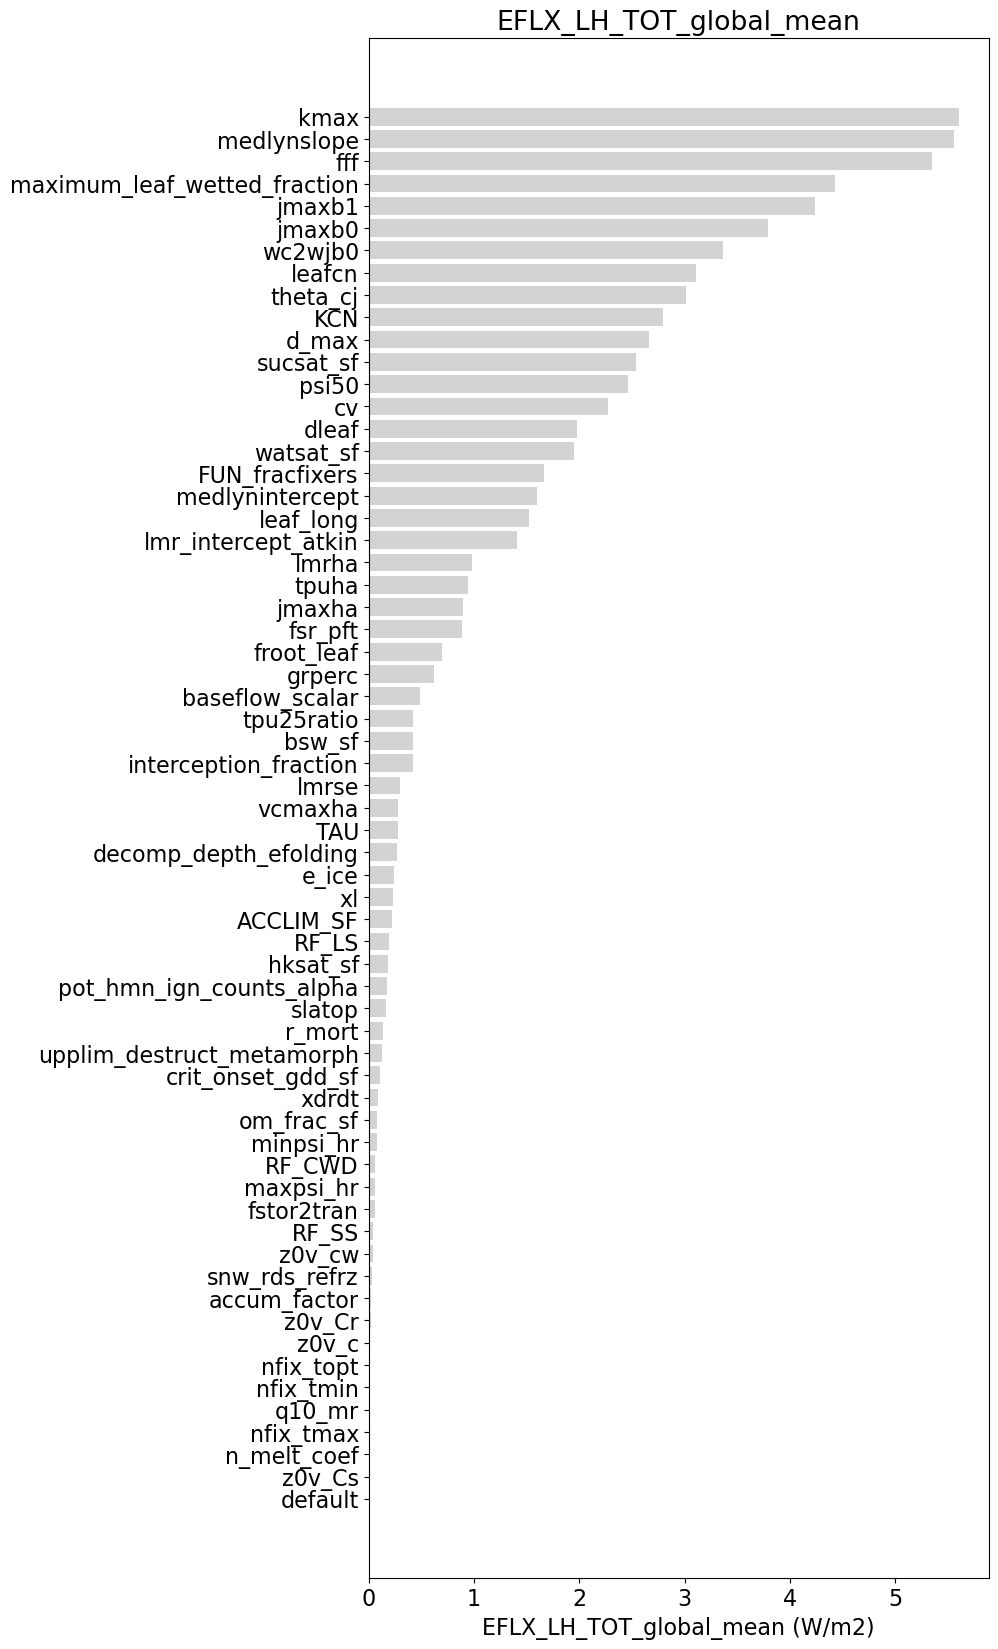

In [14]:
plt.figure(num=None, figsize=(8, 20), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

plt.barh(df_sens.index.values,df_sens[var],color='lightgrey')

plt.title('EFLX_LH_TOT_global_mean')
plt.xlabel(var+' (W/m2)')
plt.gca().invert_yaxis()


### Timeseries

In [17]:
# load postprocessed timeseries dataset
in_file = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_timeseries_1901-2023.nc'
ds = xr.open_dataset(in_file)

Text(0.5, 1.0, 'Global mean ET in CLM6 OAAT')

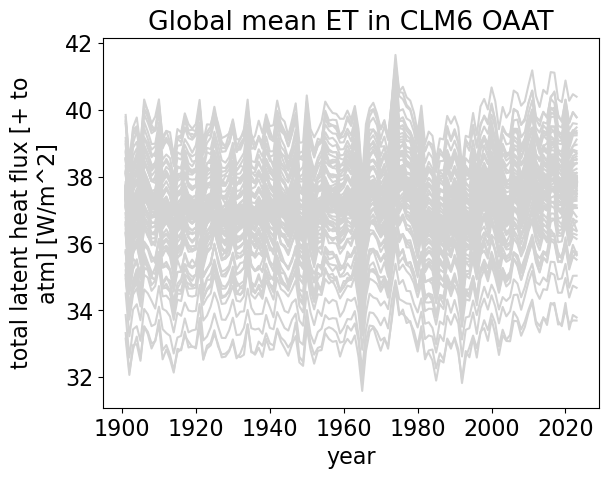

In [19]:
for e in range(118):
    ds.EFLX_LH_TOT_global_mean.isel(ens=e).plot(color='lightgrey')

plt.title('Global mean ET in CLM6 OAAT')